В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [1]:
import pandas as pd
import numpy as np

from mlpeople.io.google_drive import download_file_iss

# download files from google drive
download_file_iss('1Xz-cqp6y-Y_oCiaSJeNsbU3-o5lM-5wY', output_path='./downloads/train.csv')
download_file_iss('1jsg2iPVphDMiHCEyqQeDSc4yDcMB3-r_', output_path='./downloads/test.csv')
download_file_iss('1tv0beG2n8cUQ6KcdaXhFzQI_Fd9640gg', output_path='./downloads/sample_submission.csv')

# read train.csv / show first 5 rows / show info
raw_df = pd.read_csv('downloads/train.csv', index_col="id")
display(raw_df.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


<span style="background-color: #f60">Відповідь:</span><br/>
 - https://github.com/Maxstef/data-loves-ml-for-people-course/blob/main/src/mlpeople/preprocessing/process_bank_churn.py

In [2]:
from mlpeople.preprocessing.process_bank_churn import preprocess_data, preprocess_new_data
help(preprocess_data)

Help on function preprocess_data in module mlpeople.preprocessing.process_bank_churn:

preprocess_data(raw_df: pandas.core.frame.DataFrame, test_size: float = 0.2, target_col: str = 'Exited', stratify_col: Optional[str] = 'Exited', drop_cols: Optional[List[str]] = None, scaler_numeric: bool = True, scaler_mode: str = 'minmax', encoder_drop: Optional[str] = 'if_binary', random_state: int = 42) -> Dict[str, Union[pandas.core.frame.DataFrame, pandas.core.series.Series, List[str], sklearn.impute._base.SimpleImputer, sklearn.preprocessing._data.MinMaxScaler, sklearn.preprocessing._data.StandardScaler, NoneType, sklearn.preprocessing._encoders.OneHotEncoder]]
    Full preprocessing pipeline: split, impute, scale, and encode features.

    Parameters
    ----------
    raw_df : pandas.DataFrame
        Original dataset.
    test_size : float, default=0.2
        Validation split size.
    target_col : str, default="Exited"
        Target column name.
    stratify_col : str, default="Exited"
 

In [3]:
preprocess_result = preprocess_data(raw_df)
X_train = preprocess_result["X_train"]
train_targets = preprocess_result["train_targets"]
X_val = preprocess_result["X_val"]
val_targets = preprocess_result["val_targets"]

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [4]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, train_targets)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

Training F1 score: 100.00%
AUROC for Training: 1.00


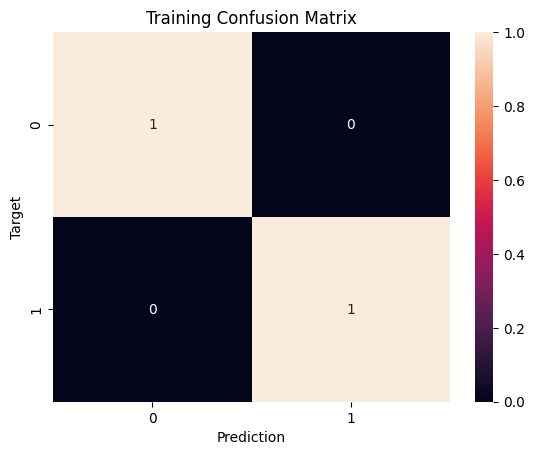

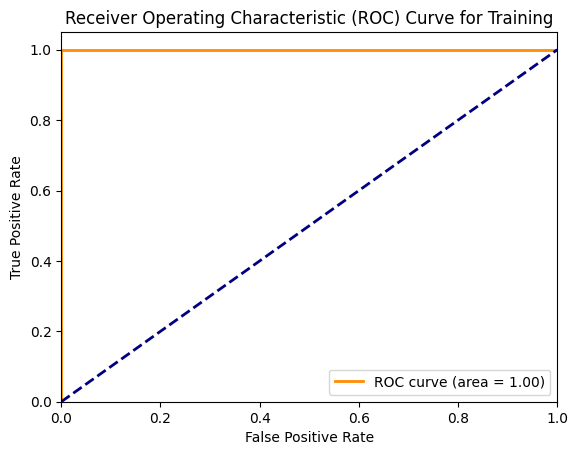

Validation F1 score: 62.96%
AUROC for Validation: 0.77


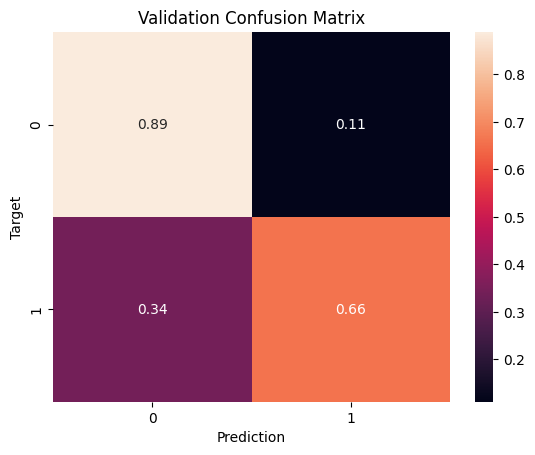

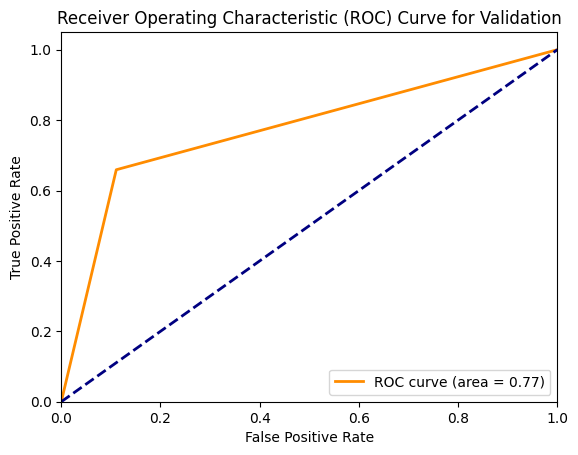

In [5]:
from mlpeople.models.logistic.visualization import predict_and_plot_confusion_matrix_roc

train_preds, train_pred_proba = predict_and_plot_confusion_matrix_roc(model_dt, X_train, train_targets, 'Training')
val_preds, val_pred_proba = predict_and_plot_confusion_matrix_roc(model_dt, X_val, val_targets, 'Validation')

In [6]:
# trained tree depth 
model_dt.tree_.max_depth

26

Training Tree 2 depth F1 score: 58.93%
AUROC for Training Tree 2 depth: 0.84


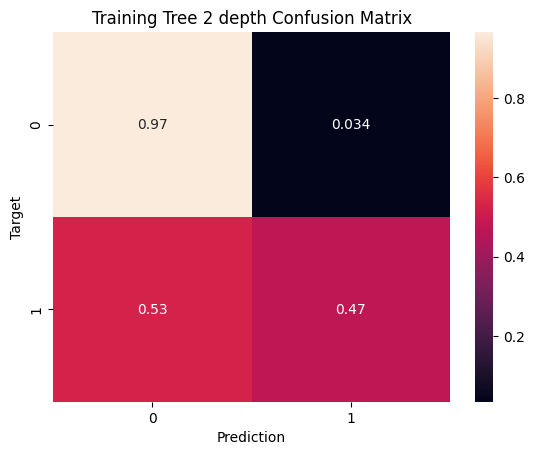

Validation Tree 2 depth F1 score: 57.05%
AUROC for Validation Tree 2 depth: 0.85


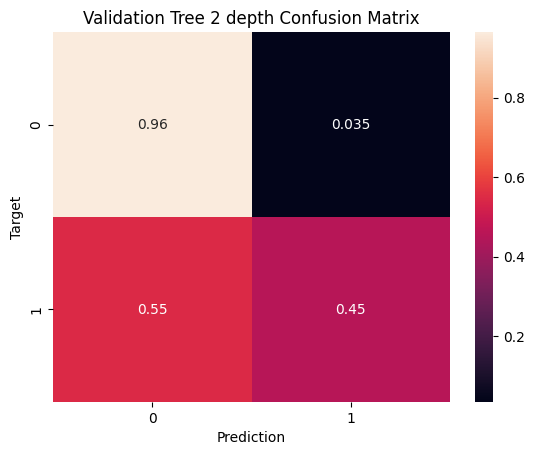

In [7]:
from sklearn.tree import DecisionTreeClassifier

model_dt_depth2 = DecisionTreeClassifier(random_state=42, max_depth=2)
model_dt_depth2.fit(X_train, train_targets)

train_preds, train_pred_proba = predict_and_plot_confusion_matrix_roc(
    model_dt_depth2,
    X_train,
    train_targets,
    'Training Tree 2 depth',
    plot_roc_curve=False,
)
val_preds, val_pred_proba = predict_and_plot_confusion_matrix_roc(
    model_dt_depth2,
    X_val,
    val_targets,
    'Validation Tree 2 depth',
    plot_roc_curve=False,
)

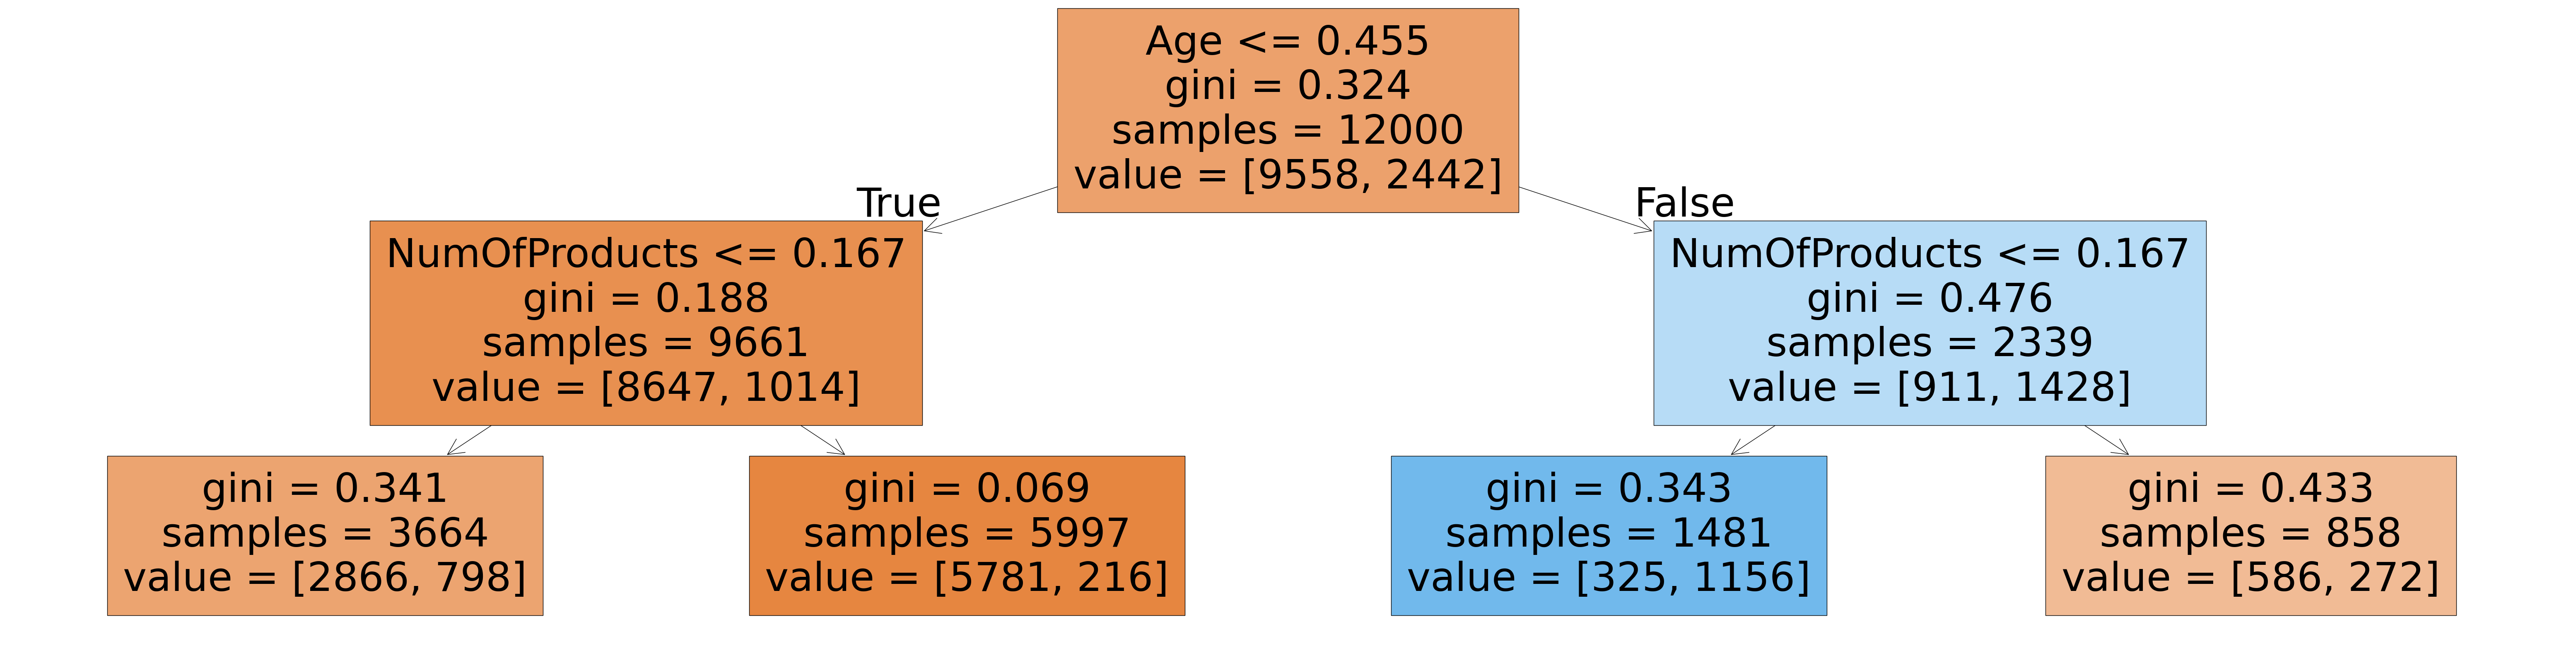

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(80,20))
plot_tree(model_dt_depth2, feature_names=X_train.columns, filled=True);

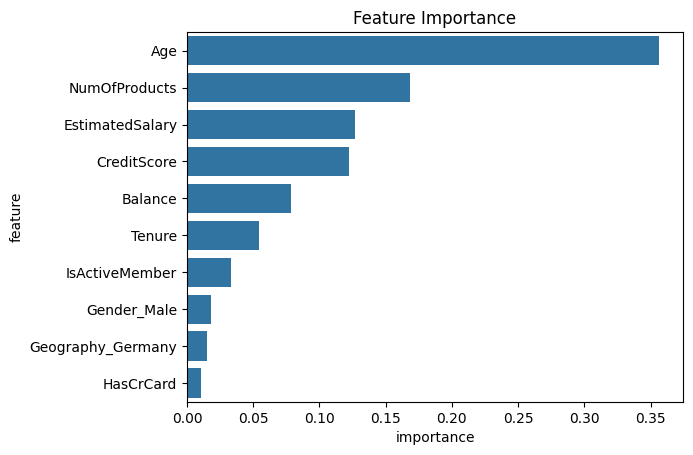

In [9]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_dt.feature_importances_
}).sort_values('importance', ascending=False)

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

<span style="background-color: #f60">Відповідь:</span><br/>
 - Використовуючи гіперпараметри за замовчуванням, модель дерева рішень демонструє явне перенавчання: вона досягає 100% точності на тренувальних даних, але показує значно гірші результати на валідаційній вибірці.
 - Без обмеження максимальної глибини дерево має глибину 26 рівнів. Серед найважливіших ознак у цій моделі - Age, NumOfProducts, EstimatedSalary та CreditScore.
 - При обмеженні максимальної глибини до 2 модель стає занадто спрощеною та використовує лише дві ознаки — Age і NumOfProducts. Водночас метрика AUROC для цієї моделі виявилася навіть дещо вищою, ніж у моделі без обмеження глибини, що свідчить про кращу узагальнювальну здатність.
 - Жодну з отриманих на цьому етапі моделей не можна вважати фінальною. Потрібне подальше налаштування гіперпараметрів та оцінювання моделі для досягнення кращого балансу між bias i variance

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)
